In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\rocke\Downloads\converted_energy_production.csv")

In [3]:
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,0.514090,1.01701,60.10,481.30
1,12.04,0.564485,1.01972,94.67,465.36
2,13.87,0.601016,1.02442,81.69,465.48
3,13.72,0.723938,1.01789,79.08,467.05
4,15.14,0.661810,1.02378,75.00,463.58
...,...,...,...,...,...
9563,17.10,0.662477,1.00553,81.82,457.32
9564,24.73,0.871126,1.01542,52.80,446.92
9565,30.44,0.749803,1.00519,56.24,429.34
9566,23.00,0.880592,1.02061,80.29,421.57


In [4]:
# Check for missing values
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [5]:
data.duplicated().sum()

41

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
# Summary of the dataset
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,0.723851,1.013237,73.334951,454.33591
std,7.444397,0.169136,0.005941,14.607513,17.03908
min,1.810000,0.338105,0.992890,25.560000,420.26000
25%,13.530000,0.556486,1.009085,63.375000,439.75000
50%,20.350000,0.694341,1.012920,75.000000,451.52000
75%,25.710000,0.886725,1.017200,84.850000,468.36500
max,37.110000,1.087374,1.033300,100.160000,495.76000


In [9]:
# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

                   temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.508222   -0.543947   
exhaust_vacuum        0.843689        1.000000     -0.415718   -0.312214   
amb_pressure         -0.508222       -0.415718      1.000000    0.101631   
r_humidity           -0.543947       -0.312214      0.101631    1.000000   
energy_production    -0.947908       -0.869900      0.518687    0.391175   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.518687  
r_humidity                  0.391175  
energy_production           1.000000  


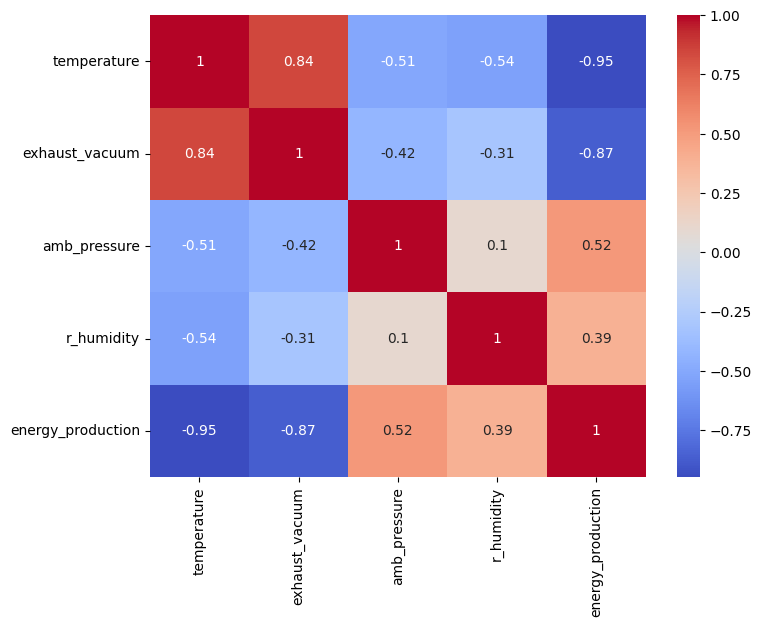

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

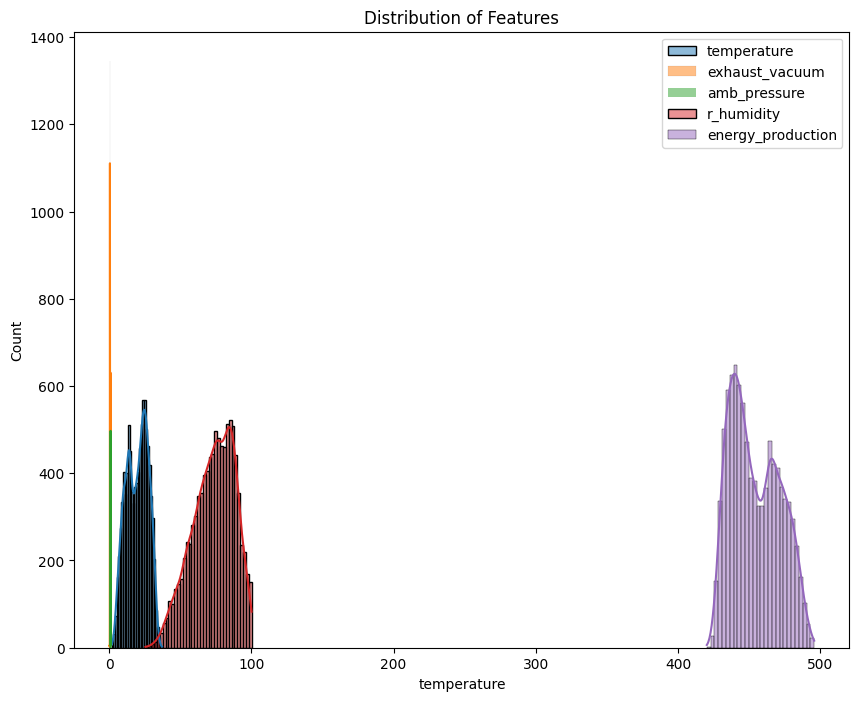

In [11]:
features = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity', 'energy_production']

plt.figure(figsize=(10, 8))
for feature in features:
    sns.histplot(data[feature], kde=True, label=feature)

plt.legend()
plt.title('Distribution of Features')
plt.show()

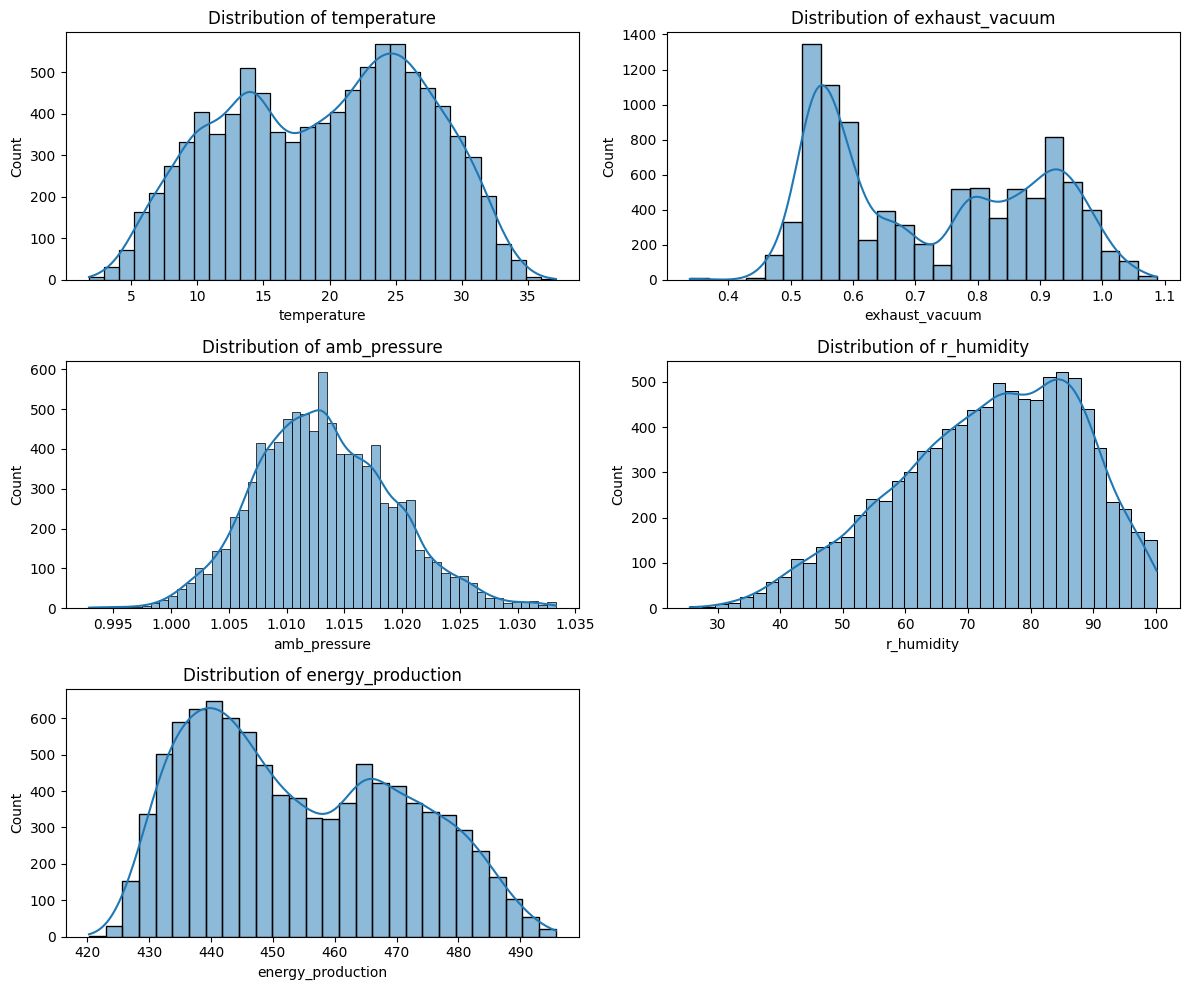

In [12]:
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

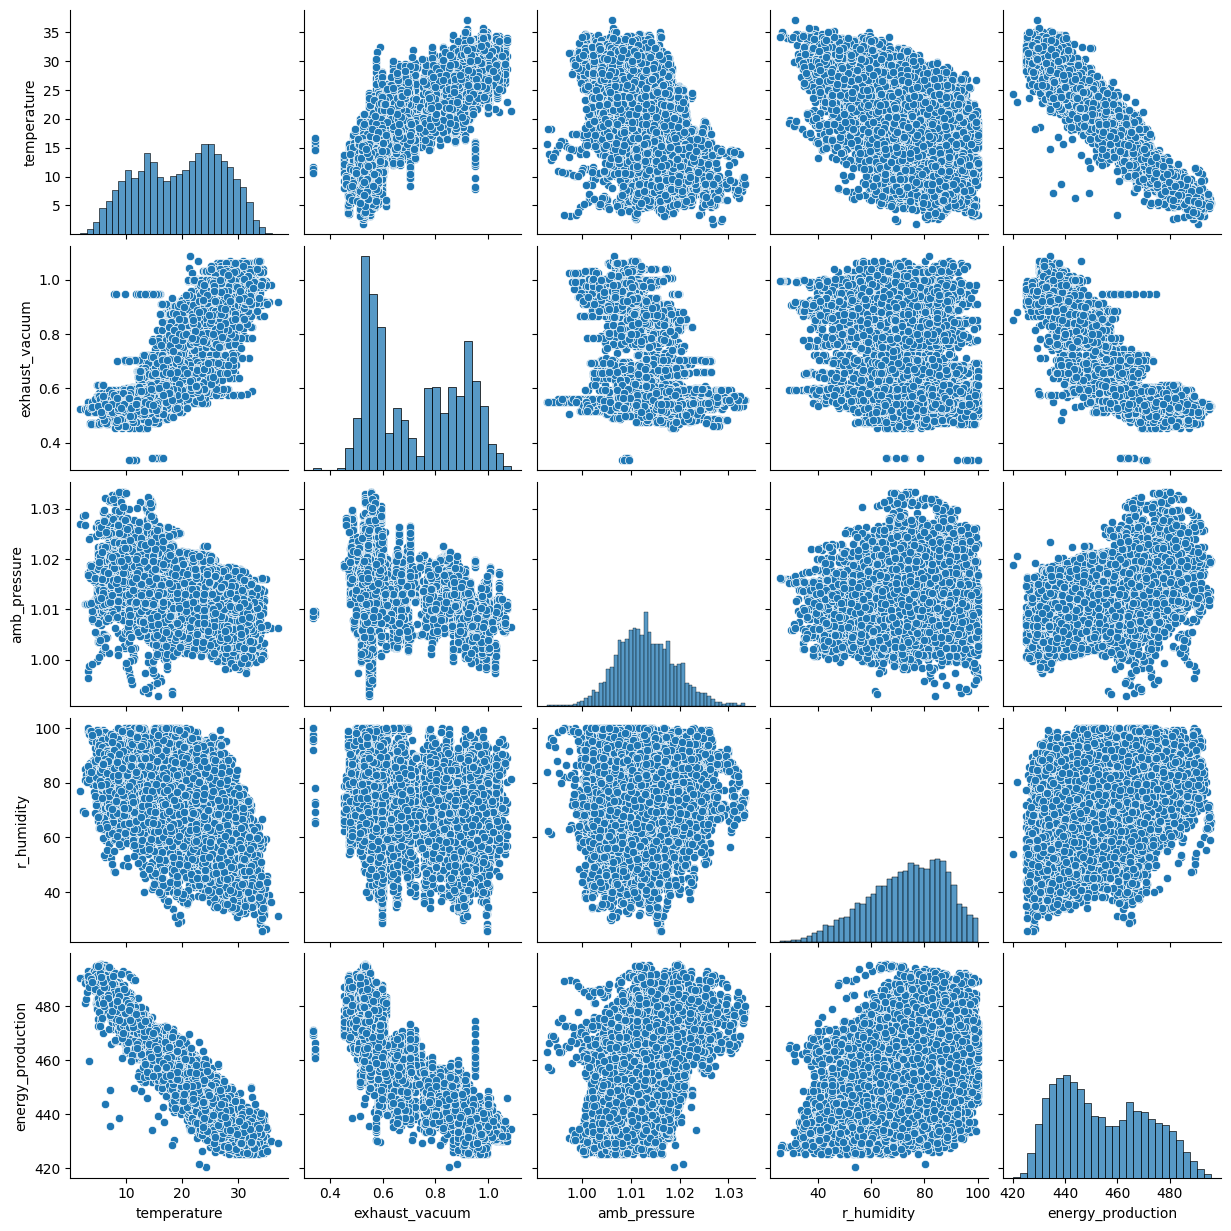

In [13]:
sns.pairplot(data)
plt.show()

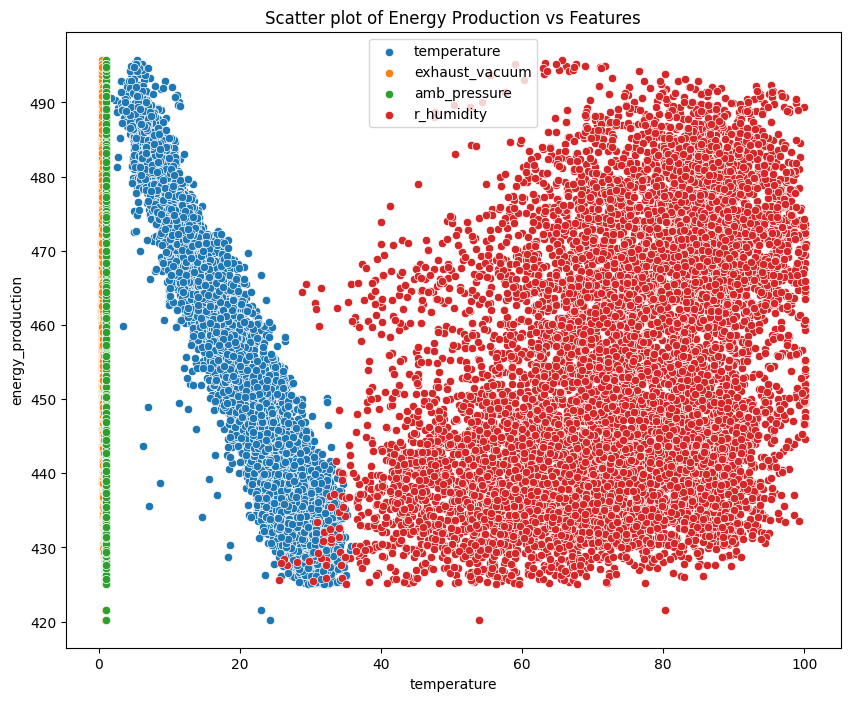

In [14]:
features = ['temperature', 'exhaust_vacuum', 'amb_pressure','r_humidity']

plt.figure(figsize=(10, 8))
for feature in features:
    sns.scatterplot(x=feature, y='energy_production', data=data, label=feature)

plt.legend()
plt.title('Scatter plot of Energy Production vs Features')
plt.show()

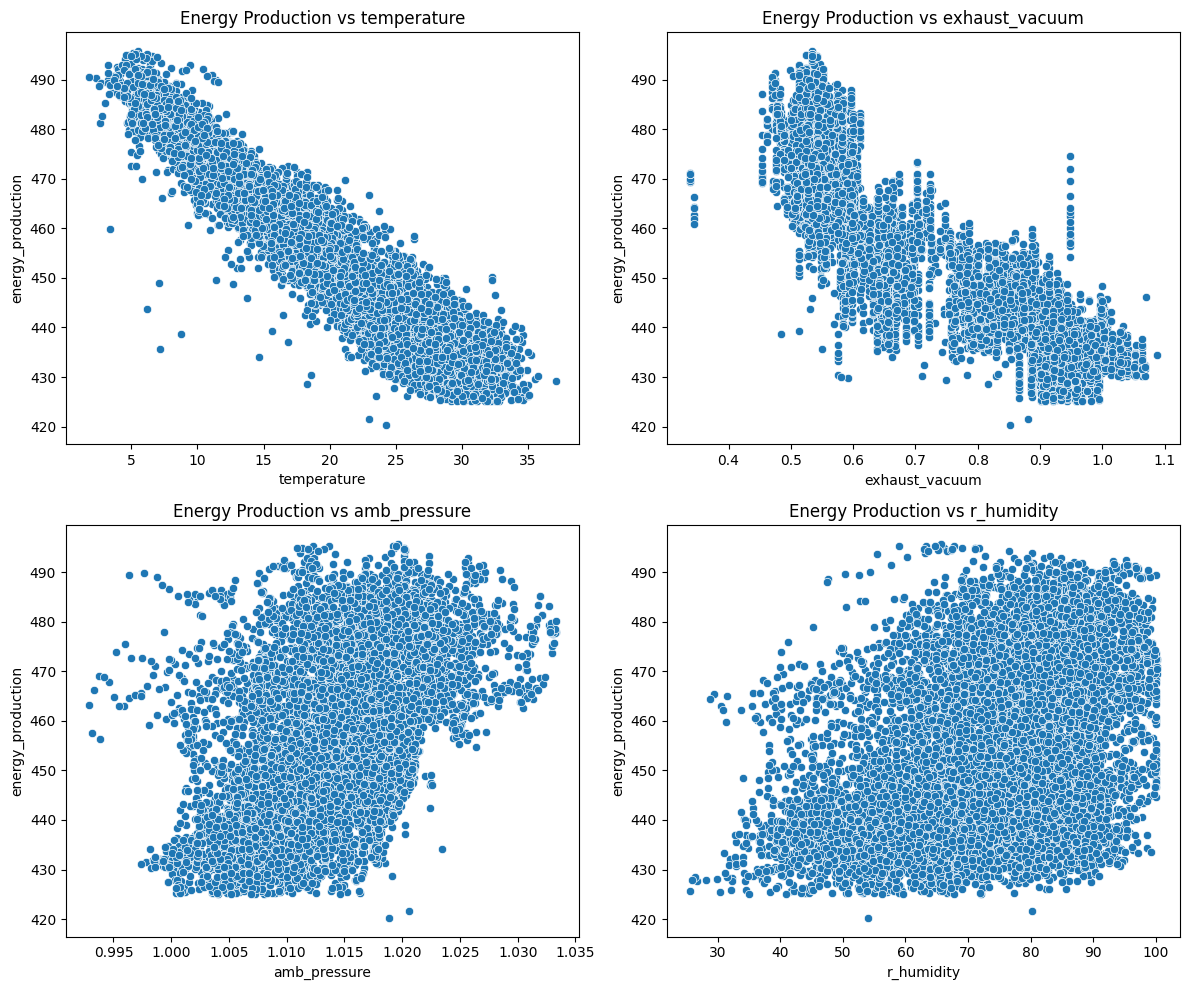

In [15]:
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='energy_production', data=data)
    plt.title(f'Energy Production vs {feature}')

plt.tight_layout()
plt.show()

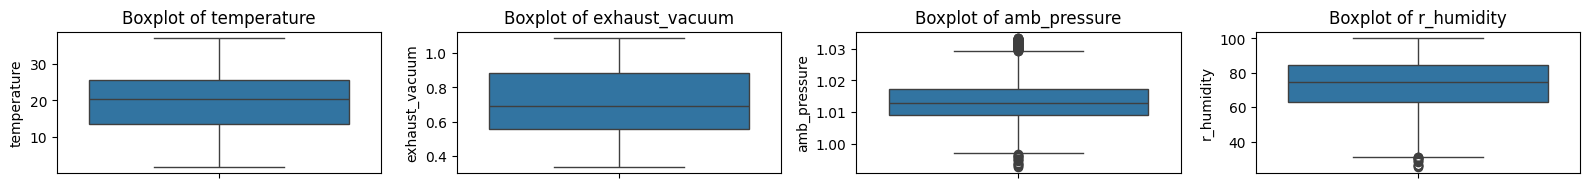

In [16]:
numerical_features = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']
# Create boxplots for numerical features
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [17]:
# Function to remove outliers using the IQR method with a stricter threshold
def remove_outliers(df, feature, multiplier=1.5):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [18]:
# Iteratively remove outliers from each numerical feature
for feature in numerical_features:
    prev_shape = data.shape[0]
    while True:
        data = remove_outliers(data, feature, multiplier=1.5)
        new_shape = data.shape[0]
        if new_shape == prev_shape:
            break
        prev_shape = new_shape

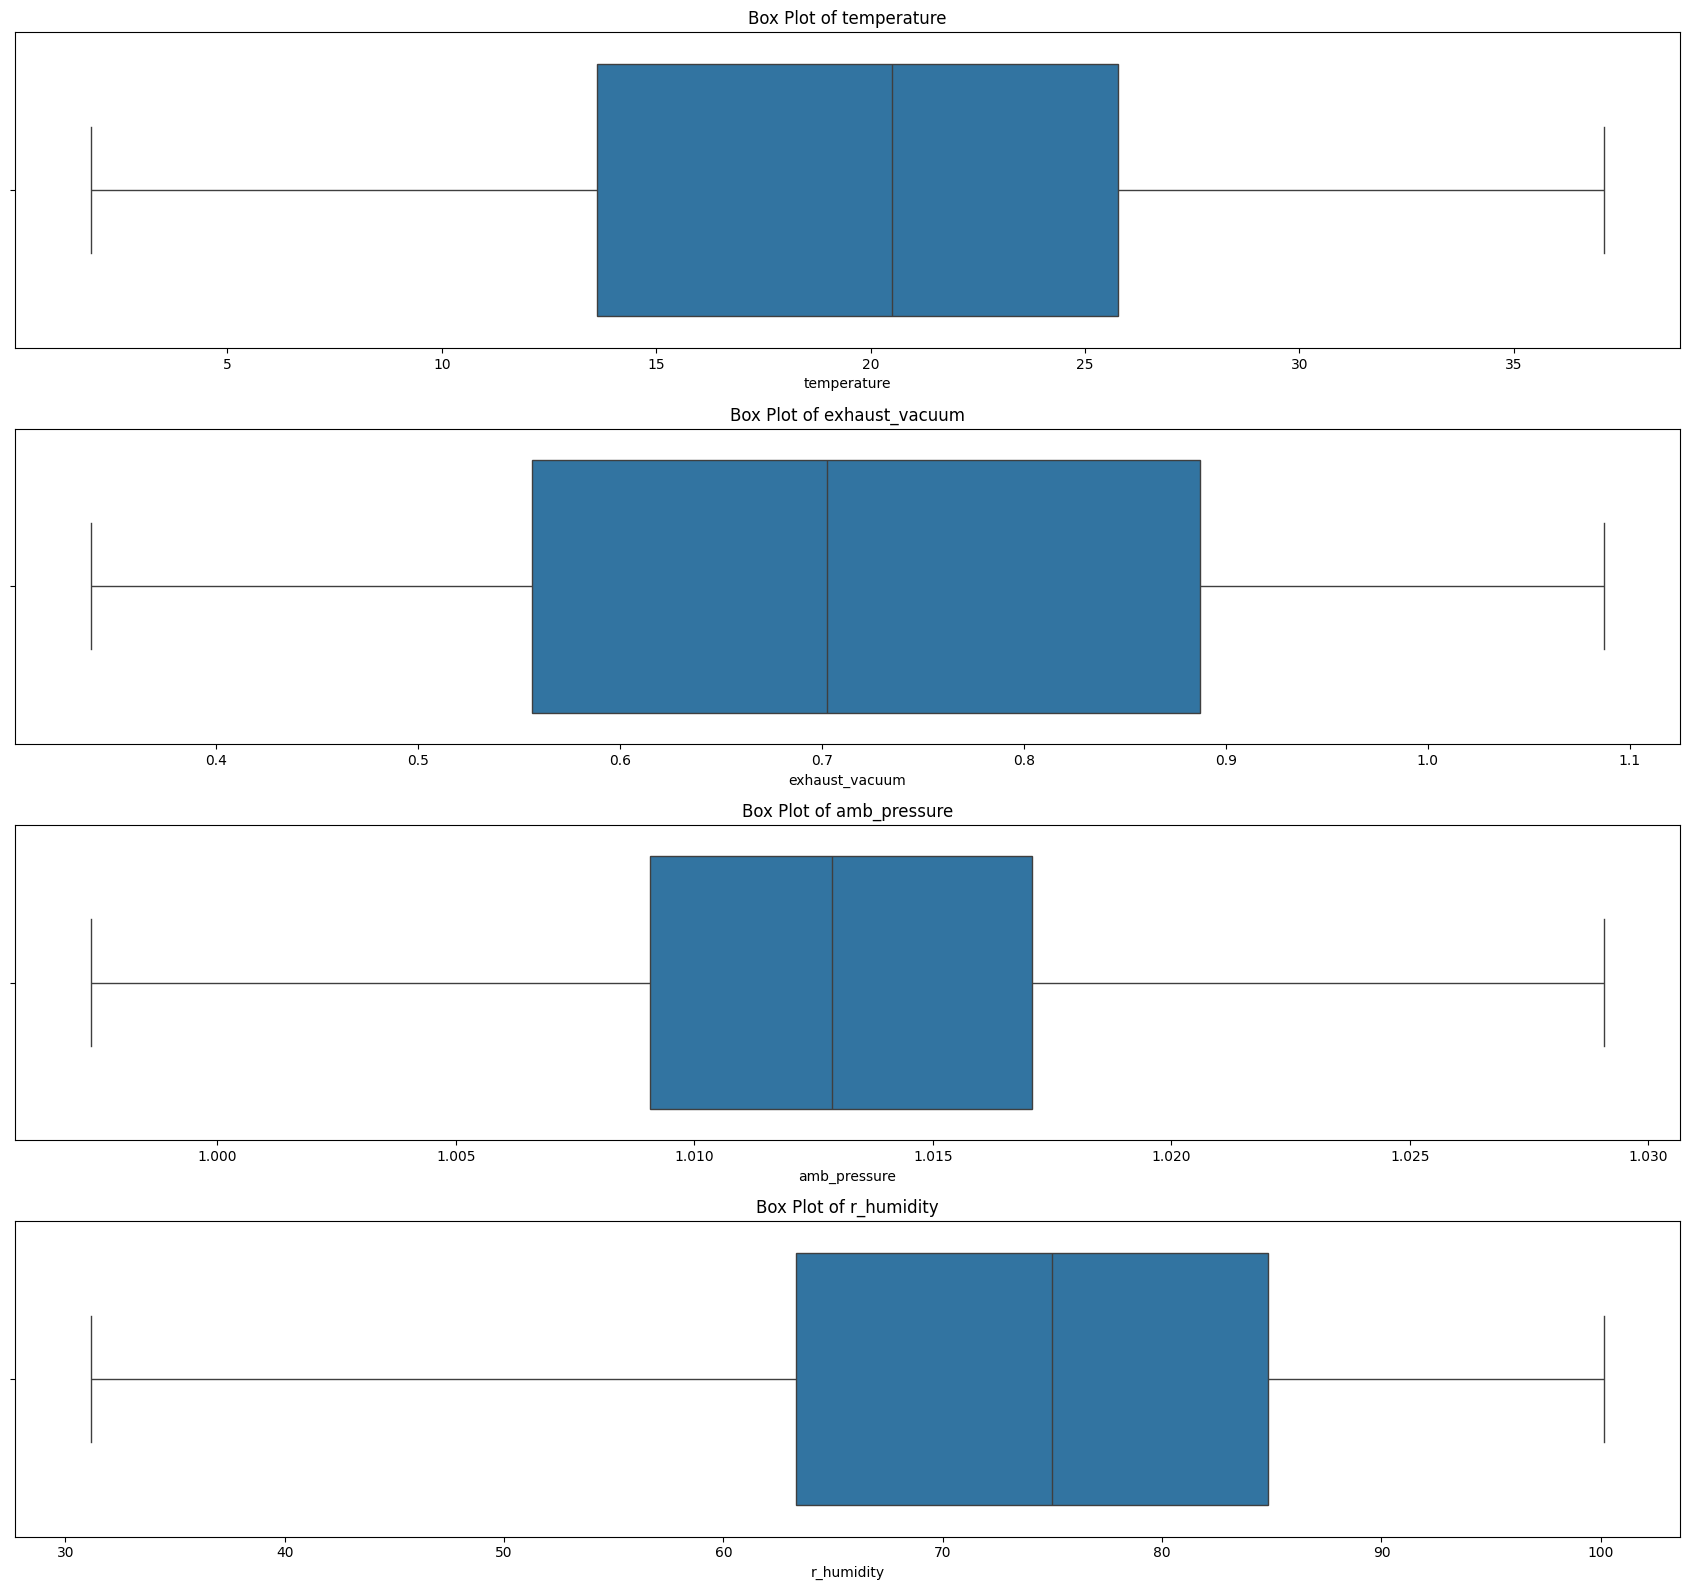

In [19]:
# Create a box plot for each numerical feature
plt.figure(figsize=(17, 16))

for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [20]:
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,0.514090,1.01701,60.10,481.30
1,12.04,0.564485,1.01972,94.67,465.36
2,13.87,0.601016,1.02442,81.69,465.48
3,13.72,0.723938,1.01789,79.08,467.05
4,15.14,0.661810,1.02378,75.00,463.58
...,...,...,...,...,...
9563,17.10,0.662477,1.00553,81.82,457.32
9564,24.73,0.871126,1.01542,52.80,446.92
9565,30.44,0.749803,1.00519,56.24,429.34
9566,23.00,0.880592,1.02061,80.29,421.57


In [21]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


data = pd.DataFrame(data)

# Add a constant to the DataFrame (intercept)
data_with_const = add_constant(data)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

print(vif_data)

             feature           VIF
0              const  56867.427181
1        temperature     16.126071
2     exhaust_vacuum      4.328184
3       amb_pressure      1.453917
4         r_humidity      1.954325
5  energy_production     13.839397


In [22]:
# Remove 'temperature' feature
data_reduced = data.drop(columns=['temperature','energy_production'])

# Recalculate VIF without the removed feature
data_reduced_with_const = add_constant(data_reduced)
vif_reduced_data = pd.DataFrame()
vif_reduced_data["feature"] = data_reduced_with_const.columns
vif_reduced_data["VIF"] = [variance_inflation_factor(data_reduced_with_const.values, i) for i in range(data_reduced_with_const.shape[1])]

print(vif_reduced_data)

          feature           VIF
0           const  39417.177603
1  exhaust_vacuum      1.325355
2    amb_pressure      1.211776
3      r_humidity      1.107209


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X = data.drop(columns=['energy_production'])
y = data['energy_production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling to the training data and then to the test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-1.44304825, -1.42652928,  2.45492673,  0.04337691],
       [-0.88228746, -1.0793722 ,  1.5609369 ,  0.3131862 ],
       [ 1.1724907 ,  1.17911682, -1.60227664,  0.01110964],
       ...,
       [ 0.26747388,  0.46039933,  0.46320871,  1.1267333 ],
       [ 0.02810837,  0.60445771,  1.20088205,  0.21020556],
       [-0.59585568, -1.23523865, -2.14323709,  0.53699747]])

In [25]:
X_test_scaled

array([[-0.97776471, -1.29900219, -0.89094878, -0.78802017],
       [ 1.1563537 ,  1.35545058, -1.47054926, -0.04381337],
       [ 1.42933797,  1.18777607, -0.55372668, -2.34165484],
       ...,
       [-0.80698145, -0.73457674, -0.02681715,  0.96539696],
       [-1.525078  , -1.19666564,  0.33850679,  0.12301528],
       [-0.2072229 ,  1.0460793 , -1.51094566,  0.95509889]])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Linear Regression RMSE: {rmse}')

Linear Regression RMSE: 4.443643578655283


In [27]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
print(f'Decision Tree RMSE: {rmse_dt}')


Decision Tree RMSE: 4.443718842927552


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
print(f'Random Forest RMSE: {rmse_rf}')


Random Forest RMSE: 3.2358892384134843


In [30]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
print(f'XGBoost RMSE: {rmse_xgb}')


XGBoost RMSE: 3.208235428733267


In [31]:
models = {
    "Linear Regression": lr,
    "Ridge": ridge,
    "Lasso": lasso,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f'{name} RMSE: {rmse}')

Linear Regression RMSE: 4.443643578655283
Ridge RMSE: 4.443592180867845
Lasso RMSE: 4.443773620211457
Decision Tree RMSE: 4.443718842927552
Random Forest RMSE: 3.2358892384134843
XGBoost RMSE: 3.208235428733267


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.DataFrame(data)

# Features and target variable
X = data.drop('energy_production', axis=1)
y = data['energy_production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {rmse}')

XGBoost RMSE: 2.932045788428104


In [34]:
from xgboost import XGBRegressor
import pandas as pd



# Drop the 'temperature' feature
data = data.drop(columns=['temperature'])

# Define features and target
X = data.drop(columns=['energy_production'])
y = data['energy_production']

# Initialize and train the model
model = XGBRegressor()
model.fit(X, y)

# Save the model
model.save_model('xgboost_model_without_temperature.json')